In [1]:
using Flux
using Flux: @epochs
using Distributions
using Plots
using Random

In [2]:
features = rand(Normal(0, 1), (200,))

200-element Array{Float64,1}:
 -0.022811472609018595
  0.11944497643105487
  0.8198869056157083
 -0.8070366438473796
 -1.067168107060356
 -0.7358374341023654
  1.416898123909858
 -0.09657925105442834
  0.5711670296023437
  1.1718736830219711
 -0.11475473425893093
  0.5386789176859611
 -0.7661326059128838
  ⋮
 -0.37025684695294636
 -1.3890065564640863
 -0.9098674060539349
 -1.9817441066506194
  0.17871861396065683
  0.5513389203310625
 -0.9996617809308539
 -1.4424677014628253
 -0.7172981279770467
 -0.11458234218712587
  0.5413733419802369
  0.8871458865121324

In [3]:
poly_features = [features features.^2 features.^3]

200×3 Array{Float64,2}:
 -0.0228115  0.000520363  -1.18703e-5
  0.119445   0.0142671     0.00170413
  0.819887   0.672215      0.55114
 -0.807037   0.651308     -0.52563
 -1.06717    1.13885      -1.21534
 -0.735837   0.541457     -0.398424
  1.4169     2.0076        2.84457
 -0.0965793  0.00932755   -0.000900848
  0.571167   0.326232      0.186333
  1.17187    1.37329       1.60932
 -0.114755   0.0131686    -0.00151116
  0.538679   0.290175      0.156311
 -0.766133   0.586959     -0.449689
  ⋮                       
 -0.370257   0.13709      -0.0507586
 -1.38901    1.92934      -2.67986
 -0.909867   0.827859     -0.753242
 -1.98174    3.92731      -7.78292
  0.178719   0.0319403     0.00570833
  0.551339   0.303975      0.167593
 -0.999662   0.999324     -0.998986
 -1.44247    2.08071      -3.00136
 -0.717298   0.514517     -0.369062
 -0.114582   0.0131291    -0.00150436
  0.541373   0.293085      0.158668
  0.887146   0.787028      0.698208

In [78]:
labels = poly_features * [1.2, -3.4, 5.6] .+ 5 + rand(200)

200-element Array{Float64,1}:
   5.138760975595823
   5.5293694460333125
   6.832836998493044
  -0.9550869524902501
  -6.2365213227952525
   0.9162562989295153
  15.810812040490422
   5.773447579216965
   5.622735266060816
  11.514481844101544
   5.781406199711924
   5.678423406365323
   0.28375738409479245
   ⋮
   4.023773711413566
 -17.318820385370273
  -3.094407027001557
 -53.6859530848495
   5.711328465220795
   5.768455735176011
  -4.73923287531502
 -20.0022344763228
   1.169944192112901
   5.275362144863958
   5.81660486183279
   8.138529552257204

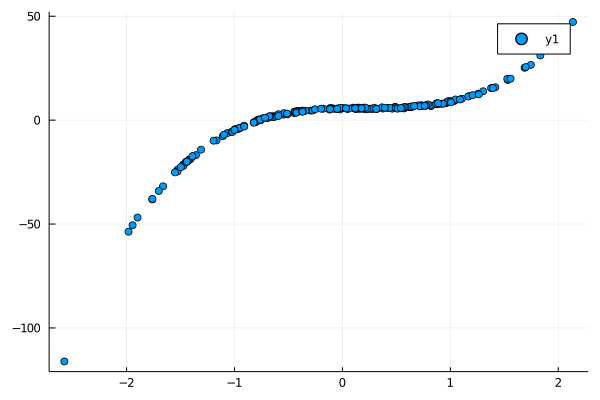

In [79]:
scatter(features, labels)

In [80]:
batch_size = 10
#init w, b
w = rand(3)
b = rand(1)
w1 = rand(3)
b1 = rand(1)

#learning rate
lr = 0.01

#epoch
epoch = 100

linreg(X, w, b) = X*w .+ b
#define Loss
function Loss(ŷ, y)
	sum((ŷ - y) .^ 2)
end

function train_model(batch_size, features, labels, w, b, lr, epoch)
    seq = []
	dt_row, dt_col = size(features)
	indices = 1:dt_row
	Rond_indices = Random.shuffle(indices)
	for j in 1:epoch
        push!(seq, log(Loss(linreg(features, w, b), labels)))
		for i in range(1, dt_row, step = batch_size)
			j = Rond_indices[i:min(i+batch_size, dt_row)]
			X = features[j,:]
			y = labels[j,:]
			L = Loss(linreg(X, w, b), y)
			gs = gradient(() -> Loss(linreg(X, w, b), y), Flux.params(w, b))
			w -= lr/batch_size * gs[w]
			b -= lr/batch_size * gs[b]
		end
	end
	return w,b,seq
	
end

ŵ, b̂, testseq = train_model(batch_size, poly_features[1:100, :], labels[1:100], w, b, lr, epoch)

w2, b2, seq = train_model(batch_size, poly_features[101:200, :], labels[101:200], w1, b1, lr, epoch)

([1.1900326744193697, -3.4216731419434376, 5.6026943118863635], [5.544908151241249], Any[9.942560773354687, 7.3430188937507745, 6.927216168779849, 6.7065591793576305, 6.5140603339673735, 6.33596844643155, 6.16629731589529, 6.001763126748032, 5.8405923339250885, 5.681875556311762  …  2.0038548621295655, 2.0037544390157347, 2.003669449379042, 2.0035981032691863, 2.0035388012394897, 2.0034901146283612, 2.0034507678776987, 2.003419622675212, 2.003395663730455, 2.0033779860144545])

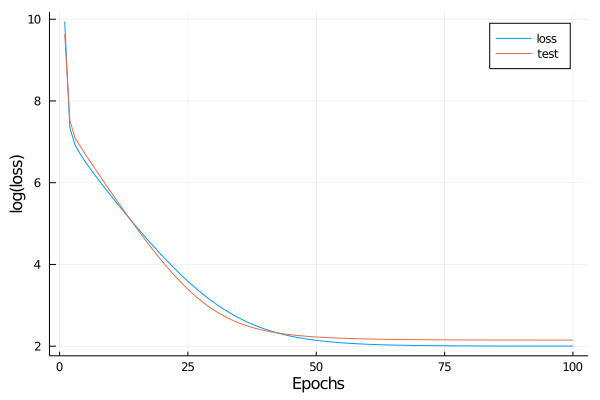

In [81]:
plot(1:100, [Array(seq) Array(testseq)], label=["loss" "test"], xlabel="Epochs", ylabel="log(loss)")

In [106]:
regData = []
for i in 1:200
  push!(regData, (poly_features[i,:], labels[i]))
end
m = Chain(Dense(3,1))
#m = Dense(2,1)

#define Loss function
loss(x,y) = Flux.mse(m(x), y)

#opt
opt = Descent(0.01)
ps = Flux.params(m)

@epochs 10 Flux.train!(loss, ps, regData, opt)
#predict value
Flux.params(m)

┌ Info: Epoch 1
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 2
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 3
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 4
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 5
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 6
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 7
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 8
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 9
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 10
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114


Params([Float32[1.2193822 -3.3848088 5.5595713], Float32[5.5550375]])

In [112]:
train_data = Flux.Data.DataLoader((Array(poly_features'), Array(labels')), batchsize=10)
model = Chain(Dense(3, 1))
loss(x, y) = Flux.mse(model(x), y)
opt = Descent(0.01)
ps = Flux.params(model)
@epochs 100 Flux.train!(loss, ps, train_data, opt)
Flux.params(model)

┌ Info: Epoch 1
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 2
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 3
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 4
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 5
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 6
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 7
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 8
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 9
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 10
└ @ Main /Users/zhouzhuofei/.julia/packages/Flux/05b38/src/optimise/train.jl:114
┌ Info: Epoch 11
└ @ Main /Us

Params([Float32[1.2062683 -3.3981824 5.607395], Float32[5.5204425]])